# Customer Buy Prediction with Neural Network (Keras)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import pandas as pd

import missingno as msno

import seaborn as sns
sns.set(style='white')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


## Data Collection

**Info about the dataset**

* Session ID : Web browsing session (unique identifier)
* Buy : Did they customer buy something (0 = false, 1=True)
* Other columns : Did the customer do the given activity (e.g click on something, visit a page) (0 = false, 1=True)

In [2]:
df_raw = pd.read_csv(
    "data/browsing.csv"
)

In [3]:
df = df_raw.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
SESSION_ID         500 non-null int64
IMAGES             500 non-null int64
REVIEWS            500 non-null int64
FAQ                500 non-null int64
SPECS              500 non-null int64
SHIPPING           500 non-null int64
BOUGHT_TOGETHER    500 non-null int64
COMPARE_SIMILAR    500 non-null int64
VIEW_SIMILAR       500 non-null int64
WARRANTY           500 non-null int64
SPONSORED_LINKS    500 non-null int64
BUY                500 non-null int64
dtypes: int64(12)
memory usage: 47.0 KB


## Data preprocesing

Inspecting values for each columns

In [6]:
fmt = '{:<20} {}'
for col_name in df:
    print(fmt.format(col_name, df[col_name].unique()))

SESSION_ID           [1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014
 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084
 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098
 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112
 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126
 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140
 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154
 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168
 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182
 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 

In [10]:
features = df.iloc[:, 1:11]
labels = df.iloc[:, -1]

## Correlations analysis

In [14]:
df['BUY'].value_counts()

0    315
1    185
Name: BUY, dtype: int64

### Correlation matrix
Inspecting features for potential good and bad features

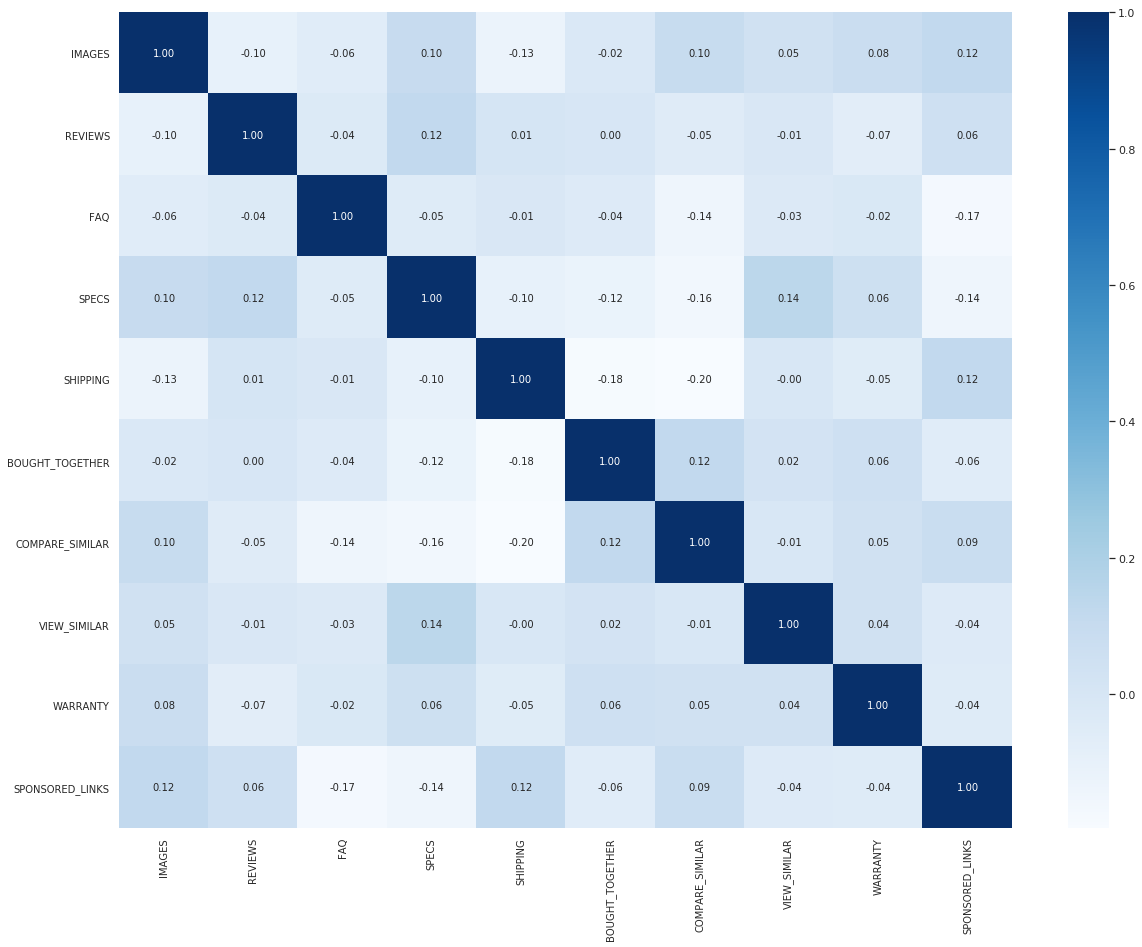

In [15]:
corr = features.corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, fmt='.2f', annot = True, cmap="Blues", annot_kws={'size':10})

heat_map = plt.gcf()
heat_map.set_size_inches(20,15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Create training and test sets

In [18]:
x = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [48]:
print("Predictor — Training : ", X_train.shape, "Predictor — Testing : ", X_test.shape )

Predictor — Training :  (350, 10) Predictor — Testing :  (150, 10)


## Baseline for Buy Prediction with Logistic Regression

In [19]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/Users/markjensen/anaconda3/envs/keras-dev/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


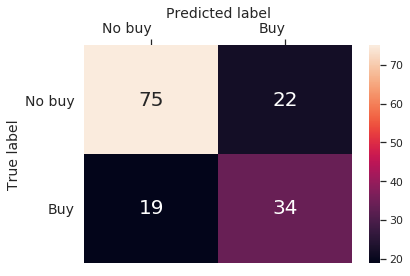

In [20]:
cfm = confusion_matrix(y_test, y_pred)
df_confusion_matrix = pd.DataFrame(cfm, ('No buy', 'Buy'), ('No buy', 'Buy'))

heatmap = sns.heatmap(df_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticks_position('top')
heatmap.xaxis.set_label_position('top')

plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

plt.show()

**Accuracy - overall, how often is the classifier correct**

Can also be calculated using "metrics.accuracy_score(y_test, y_pred)"

In [24]:
(75 + 34) / (75 + 22 + 19 + 34)

0.7266666666666667

**Misclassification Rate - Overall, how often is it wrong?**

This also known as "Error Rate"

In [25]:
(19 + 22) / (75 + 22 + 19 + 34)

0.2733333333333333

**Prevalence - How often does the "Buy" condition actually occur in our sample?**

In [26]:
(19 + 34) / (75 + 22 + 19 + 34)

0.35333333333333333

#### Classification report

* **Precision** - The fraction of predicted positives events that are actually positive (e.g. when it predicts "Buy", how often is it correct?)
* **Recall** (aka sensitivity or true positive rate): Fraction of positives that were correctly identified (e.g. when it's actually "Buy", how often does it predict "Buy"?)
* **F1-score** - A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall (a higher score equals a better model)

In [27]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        97
           1       0.61      0.64      0.62        53

   micro avg       0.73      0.73      0.73       150
   macro avg       0.70      0.71      0.70       150
weighted avg       0.73      0.73      0.73       150



#### ROC Curve

Receiver Operating Characteristic(ROC) curves are VERY help with understanding the balance between true-positive rate and false positive rates.

The following plot shows the tradeoff between sensitivity and specificity (e.g True Positive Rate and True Negative Rate).

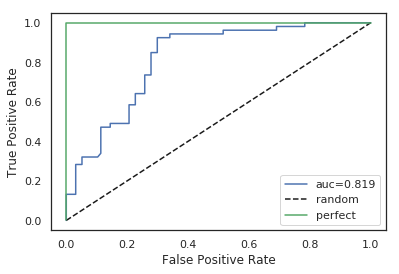

In [49]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(round(auc, 4)))
plt.plot([0,1],[0,1],'k-',label='random', linestyle='--')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=4)
plt.show()

## Using Neural Network to predict Buy

In [30]:

def create_keras_model(optimizer='rmsprop', init='glorot_uniform'):

    # Define early_stopping_monitor
    early_stopping_monitor = EarlyStopping(patience=3)

    model = Sequential()
    
    # Adding the input layer and the first hidden layer
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    #model.add(Dropout(rate=0.1))

    # Adding the second hidden layer
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    #model.add(Dropout(rate=0.1))

    # Adding the output layer
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    # optimiers = adam, rmsprop, adagrad, adadelta, sgd
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Fitting the ANN to the Training set
    #classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

    return model

np.random.seed(1337) # for reproducibility

clf = KerasClassifier(
    build_fn=create_keras_model, 
    batch_size=10, 
    epochs=100,
    verbose = 0 # 0 = nothing, 1 = progressbar, 2 =  epochs only
)

#### Hyperparameters

In [37]:
# grid search epochs, batch size
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

epochs = [100] #range(5, 30, 10) #[1, 10] # add 50, 100, 150 etc

batch_size = [10, 20, 30, 49] #[3,4,5,6,7,8,9,10] # add 5, 10, 20, 40, 60, 80, 100 etc

hyperparameters = dict(
    epochs = epochs, 
    batch_size = batch_size,
    optimizer = optimizer
)

#### GridSearchCV

In [38]:
%%time

grid_search = GridSearchCV(estimator=clf, param_grid = hyperparameters, cv = 3, scoring='accuracy')

grid_result = grid_search.fit(X_train, y_train) 

print('Done...')

/Users/markjensen/anaconda3/envs/keras-dev/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Done...
CPU times: user 13min 16s, sys: 1min 24s, total: 14min 41s
Wall time: 11min 50s


In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834286 using {'batch_size': 20, 'epochs': 100, 'optimizer': 'Adadelta'}
0.622857 (0.020042) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'SGD'}
0.685714 (0.064844) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'RMSprop'}
0.677143 (0.058376) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adagrad'}
0.722857 (0.072607) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adadelta'}
0.754286 (0.041872) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adam'}
0.742857 (0.020116) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adamax'}
0.751429 (0.012647) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Nadam'}
0.622857 (0.020042) with: {'batch_size': 20, 'epochs': 100, 'optimizer': 'SGD'}
0.728571 (0.023612) with: {'batch_size': 20, 'epochs': 100, 'optimizer': 'RMSprop'}
0.700000 (0.001214) with: {'batch_size': 20, 'epochs': 100, 'optimizer': 'Adagrad'}
0.834286 (0.046014) with: {'batch_size': 20, 'epochs': 100, 'optimizer': 'Adadelta'}
0.714286

#### Extract best model

In [42]:
model = grid_result.best_estimator_.model

#### Model performance

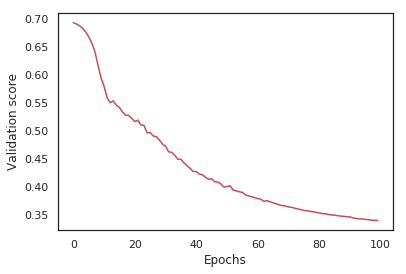

Test loss: 0.33740324071475436
Test accuracy: 0.842857141494751


In [43]:
# Visual representation of how the model performed during traning
plt.plot(grid_result.best_estimator_.model.history.history['loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

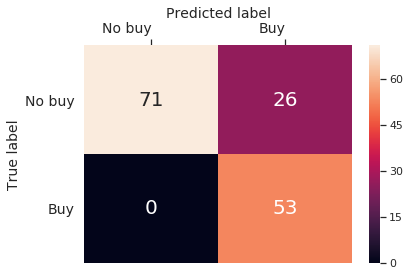

In [44]:
y_pred_keras = model.predict(X_test)
y_pred_keras = (y_pred_keras > 0.5)

cfm = confusion_matrix(y_test, y_pred_keras)
df_confusion_matrix = pd.DataFrame(cfm, ('No buy', 'Buy'), ('No buy', 'Buy'))

heatmap = sns.heatmap(df_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticks_position('top')
heatmap.xaxis.set_label_position('top')

plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

plt.show()

In [45]:
report = classification_report(y_test, y_pred_keras)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        97
           1       0.67      1.00      0.80        53

   micro avg       0.83      0.83      0.83       150
   macro avg       0.84      0.87      0.82       150
weighted avg       0.88      0.83      0.83       150

